In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

from imutils import face_utils

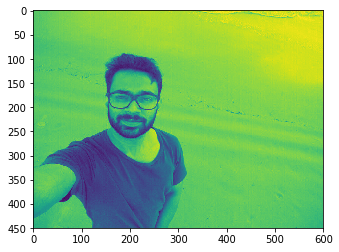

In [2]:
img = cv2.imread('download.png', 0)
img = np.float32(img)/255.
plt.imshow(img)

In [3]:
# Calculate Gradients (gx & gy) and calculate the Magnitude & Angle of the Vectors
gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
magnitude, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

print(f'gx: {gx[0]}\n')
print(f'gy: {gy[0]}\n')
print(f'magnitude: {magnitude[0]}\n')
print(f'angle: {angle[0]}\n')

gx: [ 0.         -0.01176471 -0.00392157  0.00784314  0.01176471  0.00784314
  0.00392157 -0.00784314  0.01176471  0.01960784  0.         -0.01568627
 -0.03137255  0.01176471  0.03137255 -0.00392157  0.01176471  0.00784314
 -0.01960784 -0.02352941 -0.00392157  0.04313725  0.00392157 -0.00784314
  0.         -0.01176471  0.         -0.00392157  0.02352941  0.01960784
  0.00392157  0.00392157 -0.02745098  0.          0.03137255  0.00392157
 -0.00392157 -0.02745098  0.00784314  0.00784314 -0.00784314  0.03137255
  0.01176471 -0.01176471 -0.01176471  0.00784314  0.01568627  0.00392157
 -0.00392157  0.00392157  0.00392157 -0.01568627  0.          0.02745098
  0.01176471 -0.00392157 -0.00784314  0.00392157  0.01960784  0.
 -0.01176471 -0.00392157 -0.01176471  0.          0.01568627  0.00392157
 -0.00392157 -0.00392157  0.          0.00392157  0.00784314 -0.00784314
 -0.01568627  0.01960784  0.01176471  0.         -0.00784314  0.
  0.02352941  0.         -0.01960784  0.01176471  0.01176471 -0

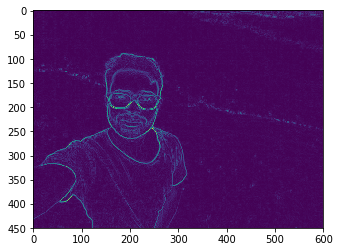

In [4]:
plt.imshow(magnitude)

Wall time: 566 ms


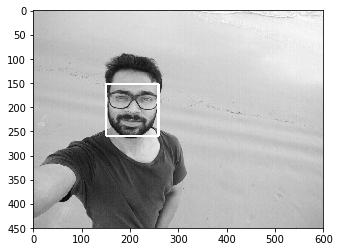

In [17]:
%%time
img = cv2.cvtColor(cv2.imread('download.png'), cv2.COLOR_BGR2GRAY)

face_detect = dlib.get_frontal_face_detector()
rects = face_detect(img, 1)

# 'rect_to_bb' --> Take a bounding predicted by dlib and convert it to the format (x, y, w, h) similar to OpenCV
for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)       # Draw Rectangles on the image for all the detected faces
    
plt.imshow(img, cmap='gray')

Wall time: 7.88 s


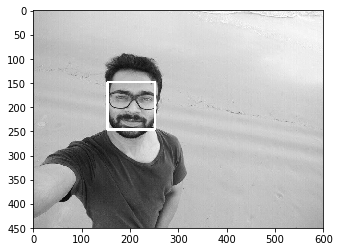

In [2]:
%%time
img = cv2.cvtColor(cv2.imread('download.png'), cv2.COLOR_BGR2GRAY)
cnn_face_detector = dlib.cnn_face_detection_model_v1('mmod_human_face_detector.dat')

# 'cnn_face_detector' -> Takes a list of images as input returning a 2d list of mmod rectangles.
rects = cnn_face_detector(img, 1)

for (i, rect) in enumerate(rects):
    x1 = rect.rect.left()
    y1 = rect.rect.top()
    x2 = rect.rect.right()
    y2 = rect.rect.bottom()
    
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 3)

plt.imshow(img, cmap='gray')

> From the above calls the CNN model is taking a lot more time than the HOG based technique